In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
from gensim import corpora
import networkx
from gensim.models.phrases import Phraser
from gensim.models import Phrases
import gensim.models as models
from gensim.models.ldamulticore import LdaMulticore, LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import re
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
import ast
from wordcloud import WordCloud
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df=pd.read_csv('avengers_pre.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak
...,...,...,...,...,...,...,...,...,...,...,...
58921,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiujykn,aminabz,wow. really just with colour pencil?,2020-02-26 18:47:14,2,wow really just with colour pencil
58922,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiuwpnr,mattwart,"Yup, the drawing was done with colour pencil (...",2020-02-26 20:40:53,2,yup the drawing be do with colour pencil prism...
58923,UnrealLuigi,'Avengers: Endgame' limited edition poster by ...,18043,https://i.redd.it/2cmyvbdx52h41.jpg,1.581760e+09,fmh8f03,blackbutterfree,"Looks to be missing Howard the Duck, Kraglin (...",2020-04-05 07:03:57,1,look to be miss howard the duck kraglin both b...
58924,gianben123,Avengers: Endgame | Tony & teenage Morgan Star...,17416,https://v.redd.it/5hhvq02eh8y31,1.573555e+09,fojdf5j,hwengiue,"First of all, Katherine Langford has nothing t...",2020-04-25 12:26:16,2,first of all katherine langford have nothing t...


In [ ]:
#I divide the text into tokens
df['Tokens'] = df['text_pre'].astype(str).apply(nltk.word_tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,Tokens
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,"[i, be, a, bit, upset, about, how, they, handl..."
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,"[so, basically, the, dragonballz, type, of, ti..."
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,"[nanotech, brah, tony, be, peak, intelligence,..."
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,"[honestly, this, feel, like, such, an, ending,..."
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,"[he, be, there, but, they, probably, do, not, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
58921,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiujykn,aminabz,wow. really just with colour pencil?,2020-02-26 18:47:14,2,wow really just with colour pencil,"[wow, really, just, with, colour, pencil]"
58922,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiuwpnr,mattwart,"Yup, the drawing was done with colour pencil (...",2020-02-26 20:40:53,2,yup the drawing be do with colour pencil prism...,"[yup, the, drawing, be, do, with, colour, penc..."
58923,UnrealLuigi,'Avengers: Endgame' limited edition poster by ...,18043,https://i.redd.it/2cmyvbdx52h41.jpg,1.581760e+09,fmh8f03,blackbutterfree,"Looks to be missing Howard the Duck, Kraglin (...",2020-04-05 07:03:57,1,look to be miss howard the duck kraglin both b...,"[look, to, be, miss, howard, the, duck, kragli..."
58924,gianben123,Avengers: Endgame | Tony & teenage Morgan Star...,17416,https://v.redd.it/5hhvq02eh8y31,1.573555e+09,fojdf5j,hwengiue,"First of all, Katherine Langford has nothing t...",2020-04-25 12:26:16,2,first of all katherine langford have nothing t...,"[first, of, all, katherine, langford, have, no..."


In [ ]:
# Initialize a Counter to count token frequencies
token_counter = Counter()

# Count frequencies
for word_list in df['Tokens']:
    token_counter.update(word_list)
# Create a DataFrame from the sorted_token_counter
df_frequencies = pd.DataFrame(list(token_counter.items()), columns=['Token', 'Frequency'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_frequencies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Token,Frequency
0,i,58340
1,be,121549
2,a,42837
3,bit,1348
4,upset,165
...,...,...
23102,procreate,2
23103,deviantart,2
23104,shoulderpad,1
23105,artiste,1


In [ ]:
processed_corpus = [token for token in  df['Tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Before proceeding, we want to associate each word in the corpus with a unique integer ID.
dictionary = corpora.Dictionary(processed_corpus)

print(f"size before stop word removal and removing most and less frequent words: {len(dictionary)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


size before stop word removal and removing most and less frequent words: 23107


In [ ]:
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sorted_stop_words = sorted(stop_words)
print(sorted_stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# we decided to exclude not from the list of stop_words
stop_words.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_ids = [dictionary.token2id[word] for word in stop_words if word in dictionary.token2id]

# Removal of stop word IDs from the dictionary
dictionary.filter_tokens(bad_ids=stop_ids)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# we filter the corpus using the new dictionary
filtered_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]
filtered_corpus = [[dictionary[id_termine] for id_termine, _ in doc] for doc in filtered_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Number of unique words in the dictionary after stop word removal:", len(dictionary.token2id))

Number of unique words in the dictionary after stop word removal: 22965


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find bigrams
bigram = Phrases(filtered_corpus, min_count=50, threshold=0.3, scoring='npmi') #threshold is based on Normalized Pointwise Mutual Information (npmi)
bigram_mod = Phraser(bigram)

# Find trigrams
trigram = Phrases(bigram[filtered_corpus], min_count=20,  threshold=0.3, scoring='npmi')
trigram_mod = Phraser(trigram)

# Apply bigram and trigram models to the texts
filtered_corpus = [bigram_mod[doc] for doc in filtered_corpus]
filtered_corpus = [trigram_mod[bigram_mod[doc]] for doc in filtered_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set to store unique bigram words
unique_bigrams = set()

# Iterate over all documents
for idx in range(len(filtered_corpus)):
    # Add bigrams to set and print words containing underscores
    words_with_underscore = [token for token in filtered_corpus[idx] if '_' in token]
    unique_bigrams.update(words_with_underscore)

# Set to store unique trigram words with two underscores
unique_trigrams = set()

# Iterate over all documents
for idx in range(len(filtered_corpus)):
    # Add trigrams to set and print words containing two underscores
    words_with_two_underscores = [token for token in filtered_corpus[idx] if token.count('_') == 2]
    unique_trigrams.update(words_with_two_underscores)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(unique_bigrams))
print(len(unique_trigrams))

2225
129


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sorted_bigrams = sorted(unique_bigrams)

# Display the sorted list
for bigram in sorted_bigrams:
    print(bigram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


able_arc
able_banner
able_clint
able_either
able_fight
able_mjolnir
able_mjolnir_wield
able_strong
able_use
able_wield
absolutely_especially
act_character
act_god
act_talk
action_consequence
actually_deal
actually_fun
actually_strip
adam_warlock
add_thank
add_year
affect_alternate
affect_change
age_ffh
age_lift
age_ultron
age_vision
alive_original
alive_right
almost_die
almost_end
almost_even
alone_stand
already_day
already_get
already_someone
also_awesome
also_bring
also_callback
also_different
also_everyone
also_falcon
also_final
also_hard
also_people
also_portal
also_quill
also_way
alternate_assume
alternate_bucky
alternate_carter
alternate_change
alternate_change_create
alternate_create
alternate_exist
alternate_life
alternate_main
always_cap
always_hulk
always_movie
amazing_cool
amazing_ever
amazing_mjolnir
america_avengers
america_big
america_bucky
america_explain
america_guy
america_hold
amount_money
ancient_cap
ancient_hulk
ancient_hulk_one
ancient_infinity
ancient_mean_one
anc

In [ ]:
unique_trigrams

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'able_mjolnir_wield',
 'alternate_change_create',
 'ancient_hulk_one',
 'ancient_mean_one',
 'ancient_movie_one',
 'ancient_one_stone',
 'ant_hank_man',
 'ant_man_wasp',
 'avenger_scarlet_witch',
 'beat_thanos_thor',
 'become_past_present',
 'bit_not_see',
 'black_never_widow',
 'black_new_captain',
 'black_scene_widow',
 'black_widow_bring',
 'black_widow_captain',
 'black_widow_hawkeye',
 'black_widow_new',
 'cameo_lee_stan',
 'captain_also_america',
 'captain_become_america',
 'captain_falcon_america',
 'captain_past_america',
 'captain_show_america',
 'change_create_exist',
 'come_avatar_bargain',
 'comment_not_see',
 'corvus_glaive_midnight',
 'dead_black_widow',
 'death_not_see',
 'death_not_tony',
 'destroy_go_thanos',
 'die_not_tony',
 'different_past_present',
 'downey_jr_robert',
 'dust_ned_peter',
 'end_not_see',
 'end_time_travel',
 'ending_like_really',
 'even_make_not',
 'even_not_know',
 'even_not_see',
 'even_not_time',
 'fan_love_service',
 'far_home_trailer',
 'feel_

In [ ]:
# Create sets for excluded words
excluded_below_set = set()
excluded_above_set = set()

# Iterate over each (token, token_id) in the token2id mapping of the dictionary
for token_id, token in dictionary.items():
    # Count the number of documents in which the word appears at least once
    if token in document_counts:
        freq = document_counts[token]

        # If the word appears in just one document, add it to excluded_below_set
        if freq < 2:
            excluded_below_set.add(token)

        # If the word appears in more than 20% of the documents, add it to excluded_above_set
        if freq / len(processed_corpus) > 0.2:
            excluded_above_set.add(token)

# Update document_counts with the count of unique tokens in the processed_corpus
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

# Print or use excluded_below_set and excluded_above_set as needed
print("Excluded below set:", excluded_below_set)
print("Number of words in just one document:", len(excluded_below_set))

print("Excluded above set:", excluded_above_set)
print("Number of words above 20% of documents:", len(excluded_above_set))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Excluded below set: {'vpgwi', 'reallly', 'nyongo', 'perpetuity', 'disks', 'circumvent', 'angourice', 'uge', 'stuntwoman', 'counterintuitive', 'ballot', 'generalization', 'kart', 'shananigan', 'humbling', 'fucko', 'infantry', 'unspeak', 'chhoy', 'sirius', 'supermodel', 'wince', 'iir', 'finisher', 'pemda', 'crusaders', 'seasonsandmovie', 'shad', 'defiantly', 'cork', 'tinking', 'hoax', 'proffhulk', 'shebang', 'buttfuck', 'flippantly', 'leftmost', 'garlick', 'reinfect', 'teleological', 'vorjmir', 'emporer', 'monumentous', 'toknee', 'muc', 'mirroring', 'implie', 'ragnorock', 'shitballs', 'kinging', 'photobombe', 'adopted', 'murka', 'letting', 'trader', 'cairn', 'thunderstorm', 'nugget', 'engulfs', 'nye', 'dampen', 'intially', 'timestoneception', 'het', 'twofer', 'becuase', 'obituary', 'godd', 'joestar', 'cate', 'paillotin', 'dexterity', 'bernie', 'wearegroot', 'reedit', 'middling', 'rickroll', 'surly', 'baybeeeee', 'brainwashed', 'cristiano', 'woodard', 'nueron', 'unpacked', 'terminology', 

In [ ]:
# we filter the dictionary
dictionary.filter_extremes(no_below=2, no_above=0.2)

In [ ]:
print("Number of final unique words in the dictionary:", len(dictionary.token2id))
print("Number of documents:", len(processed_corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of final unique words in the dictionary: 13062
Number of documents: 58926


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_corpus = [dictionary.doc2bow(doc) for doc in filtered_corpus]
filtered_corpus = [[dictionary[id_termine] for id_termine, _ in doc] for doc in filtered_corpus]

bow_corpus = [dictionary.doc2bow(text) for text in filtered_corpus]
tfidf = models.TfidfModel(bow_corpus)
#apply the TF-IDF transformation to the entire bag-of-words corpus.
tfidf_corpus = tfidf[bow_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ntopics = list(range(3, 10))

metrics = pd.DataFrame({'topics': ntopics, 'Cv_Coherence': [0.0] * len(ntopics), 'UMASS coherence': [0.0] * len(ntopics)})


for num_topics in range(len(ntopics)):
    lda_model= LdaModel(
        random_state=42,
        alpha='auto',
        eta="auto",
        corpus=bow_corpus,
        chunksize=1000,
        passes = 20,
        id2word=dictionary,
        num_topics=ntopics[num_topics]
    )

    print("Number of topics:", ntopics[num_topics])

    # Calculate Coherence Scores
    metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
    metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='u_mass').get_coherence()


 # Print the calculated metrics
    print("Cv_Coherence:", metrics['Cv_Coherence'][num_topics])
    print("UMASS coherence:", metrics['UMASS coherence'][num_topics])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 3


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.4038162563899624
UMASS coherence: -4.320070209427551


Number of topics: 4


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.43079051181324807
UMASS coherence: -4.463128445843554
Number of topics: 5


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.3467192409526235
UMASS coherence: -4.894631439297589
Number of topics: 6


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.37811682058640583
UMASS coherence: -4.631999795852466
Number of topics: 7


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.32401433179958605
UMASS coherence: -4.858613159714152
Number of topics: 8


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.3611441643285061
UMASS coherence: -4.519209042743313
Number of topics: 9


<ipython-input-30-1f239c28517c>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
<ipython-i

Cv_Coherence: 0.37284597257825186
UMASS coherence: -4.623467636536656


<ipython-input-30-1f239c28517c>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='u_mass').get_coherence()
<ipy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


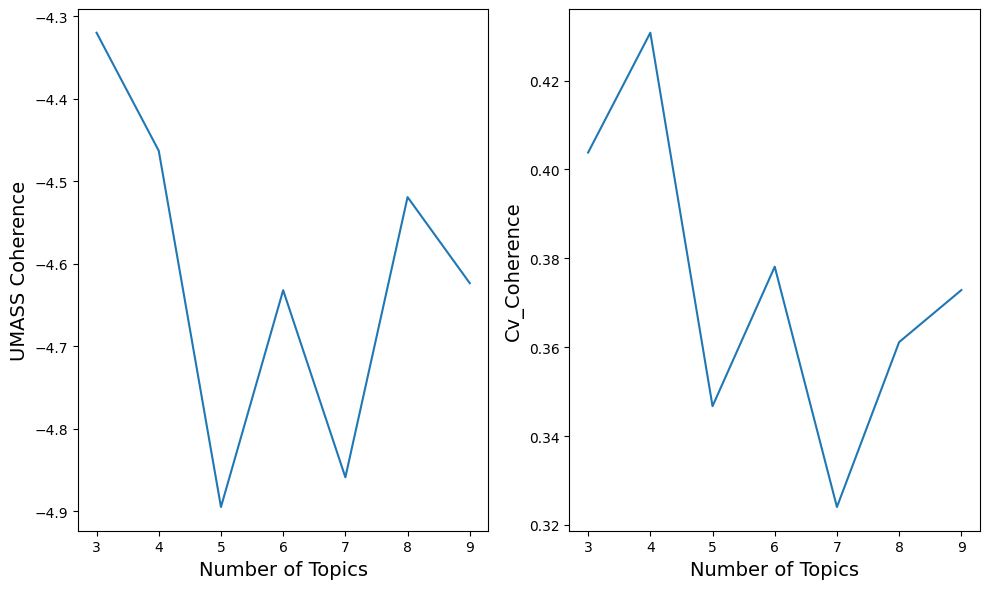

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(metrics["topics"], metrics["UMASS coherence"])
ax2.plot(metrics["topics"], metrics["Cv_Coherence"])

# Add labels and title
ax1.set_xlabel("Number of Topics", fontsize=14)
ax1.set_ylabel("UMASS Coherence", fontsize=14)

ax2.set_xlabel("Number of Topics", fontsize=14)
ax2.set_ylabel("Cv_Coherence", fontsize=14)



plt.tight_layout()
plt.show()

In [ ]:
# Number of topics
num_topics = 4

# Create LDA model
lda_model = LdaModel(
    corpus=bow_corpus,
    chunksize=1000,
    passes=20,
    id2word=dictionary,
    num_topics=num_topics,
    alpha='auto',
    eta='auto',
    random_state=42
)

# Print Coherence Scores
print("Cv_Coherence:", CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence())
print("UMASS coherence:", CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='u_mass').get_coherence())

# Save the model
lda_model.save('lda.model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cv_Coherence: 0.43079051181324807
UMASS coherence: -4.463128445843554


In [ ]:
lda_model_topics = lda_model.show_topics(num_topics=7, num_words=10)

for topic, words in lda_model_topics:
    print(f"Topic {topic}: {words}")

Topic 0: 0.014*"would" + 0.011*"get" + 0.011*"movie" + 0.009*"scene" + 0.009*"like" + 0.008*"one" + 0.008*"go" + 0.008*"make" + 0.008*"could" + 0.007*"think"
Topic 1: 0.015*"avengers" + 0.012*"steve" + 0.012*"play" + 0.011*"new" + 0.010*"old" + 0.010*"day" + 0.008*"answer" + 0.008*"future" + 0.008*"hi" + 0.007*"machine"
Topic 2: 0.020*"yeah" + 0.009*"imagine" + 0.008*"world" + 0.007*"joke" + 0.007*"etc" + 0.007*"ultron" + 0.007*"understand" + 0.006*"choose" + 0.006*"decision" + 0.006*"arc"
Topic 3: 0.013*"war" + 0.008*"big" + 0.007*"avatar" + 0.007*"agree" + 0.007*"release" + 0.006*"infinity" + 0.006*"especially" + 0.006*"next" + 0.006*"story" + 0.006*"civil"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_lda = gensimvis.prepare(lda_model, tfidf_corpus, dictionary, sort_topics=True)
LDAvis_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.399121 -0.055685       1        1  57.792834
3     -0.078628  0.372347       2        1  17.381648
1     -0.168980 -0.201743       3        1  13.193022
2     -0.151513 -0.114919       4        1  11.632496, topic_info=           Term         Freq        Total Category  logprob  loglift
145        yeah   405.000000   405.000000  Default  30.0000  30.0000
288       would  1371.000000  1371.000000  Default  29.0000  29.0000
253    avengers   342.000000   342.000000  Default  28.0000  28.0000
441         war   514.000000   514.000000  Default  27.0000  27.0000
408         get  1112.000000  1112.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
567        okay    73.645986    73.870987   Topic4  -5.6135   2.1483
351     whether    75.669589    75.901823   Topic4  -5.5864   2.1483
2381  available    82.780743    83.048153   Topic4  -5.4965   2.1481
1651    respect    75.784501    76.019368   Topic4  -5.5848   2.1483
604      rather   104.297805   105.337241   Topic4  -5.2655   2.1415

[163 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
354       2  0.994989     act
793       2  0.998172  action
1966      2  0.997329   agree
1414      3  0.994422   allow
1631      2  0.999084   along
...     ...       ...     ...
353       4  0.996202   world
288       1  0.999684   would
1897      2  0.996345   write
779       4  0.997309  writer
145       4  1.000286    yeah

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [ ]:
# Extract relevant columns from topic_info
selected_columns = [ 'Term', 'Freq', 'Total', 'Category', 'logprob', 'loglift']
topic_info_df = LDAvis_lda.topic_info[selected_columns]

# Create a DataFrame
topics_df = pd.DataFrame(topic_info_df)
# Calculate the new column 'slide_value'
topics_df['slide_value'] = (0.4) * topics_df['loglift'] + 0.6 * topics_df['logprob']
topics_df = topics_df[topics_df['Category'] != 'Default']

topics_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Term,Freq,Total,Category,logprob,loglift,slide_value
288,would,1371.208768,1371.432842,Topic1,-4.2924,0.5481,-2.35620
408,get,1112.743723,1112.965269,Topic1,-4.5012,0.5481,-2.48148
79,movie,1071.213798,1071.435841,Topic1,-4.5393,0.5481,-2.50434
193,scene,881.613705,881.838536,Topic1,-4.7340,0.5481,-2.62116
52,like,867.587488,867.810835,Topic1,-4.7501,0.5480,-2.63086
...,...,...,...,...,...,...,...
567,okay,73.645986,73.870987,Topic4,-5.6135,2.1483,-2.50878
351,whether,75.669589,75.901823,Topic4,-5.5864,2.1483,-2.49252
2381,available,82.780743,83.048153,Topic4,-5.4965,2.1481,-2.43866
1651,respect,75.784501,76.019368,Topic4,-5.5848,2.1483,-2.49156


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


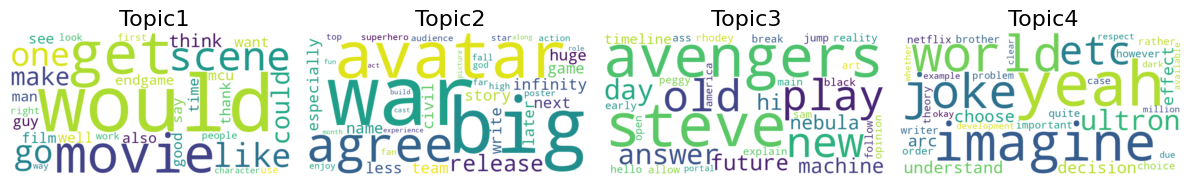

In [ ]:
topic_terms = defaultdict(list)

# Iterate over the DataFrame to populate the dictionary
for index, row in topics_df.iterrows():
    category = row['Category']
    term = row['Term']
    slide_value = row['slide_value']
    topic_terms[category].append((term, slide_value))

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(12, 36))

# Flatten the axis array for easier iteration
ax = ax.flatten()

# Create a word cloud for each category and plot it on a subplot
for i, (category, terms) in enumerate(topic_terms.items()):

        wordcloud_data = {term: slide_value for term, slide_value in terms}


        # Create the WordCloud object using word frequencies as weights
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

        # Plot the WordCloud on the i-th subplot
        ax[i].imshow(wordcloud, interpolation='bilinear')
        ax[i].set_title(f" {category}",fontsize=16 )
        ax[i].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()